## Training Stats Pickle

In [1]:
"""Import from parent directory."""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

In [4]:
import os
import xmltodict
import pickle

TYPE = "train"
ANNOTATIONS_PATH_STR = 'data/ILSVRC2015/Annotations/VID/'
PICKLE_FPATH = 'dataset/imagenetvid/train_data_stats.pkl'


if os.path.isfile(PICKLE_FPATH):
    pkl_file = open(PICKLE_FPATH, 'rb')
    stats = pickle.load(pkl_file)
    paths = pickle.load(pkl_file)
    pkl_file.close()
else:  
    paths = {
        "missing_bbox": [],
        "multiple_bboxes": [],
        "single_bboxes": []
    }
    stats = {
        "missing_bbox": 0,
        "multiple_bboxes": 0,
        "single_bboxes": 0
    }
    annotations_base_path = os.path.join(ANNOTATIONS_PATH_STR, TYPE)
    for dir1 in os.listdir(annotations_base_path):
        dir1 = os.path.join(annotations_base_path + "/" + dir1)
        for snippet_path in os.listdir(dir1):
            snippet_path = os.path.join(dir1 + "/" + snippet_path)

            dict_obj = { snippet_path : [] }
            counts = {
                "missing_bbox": 0,
                "multiple_bboxes": 0,
                "single_bboxes": 0,
                "total": 0
            }

            for f in os.listdir(snippet_path):
                if f[-3:] != 'xml':
                    continue
                filepath = snippet_path + "/" + f
                with open(filepath) as file:
                    fobj = xmltodict.parse(file.read())

                annotation = fobj['annotation']
                if "object" not in annotation:
                    # no bounding boxes
                    counts["missing_bbox"] += 1
                    stats["missing_bbox"] += 1
                elif isinstance(annotation["object"], list):
                    # multiple objects in a frame
                    counts["multiple_bboxes"] += 1
                    stats["multiple_bboxes"] += 1
                else:
                    # single object in a frame
                    counts["single_bboxes"] += 1
                    stats["single_bboxes"] += 1
                counts["total"] += 1

            if counts["missing_bbox"] > counts["multiple_bboxes"] and \
               counts["missing_bbox"] > counts["single_bboxes"]:
                # missing_bbox -> discard
                ratio = counts["missing_bbox"] / counts["total"]
                paths["missing_bbox"].append((snippet_path, ratio))
            elif counts["multiple_bboxes"] > counts["missing_bbox"] and \
               counts["multiple_bboxes"] > counts["single_bboxes"]:
                # multiple bboxes
                ratio = counts["multiple_bboxes"] / counts["total"]
                paths["multiple_bboxes"].append((snippet_path, ratio))
            else:
                # single bbox
                ratio = counts["single_bboxes"] / counts["total"]
                paths["single_bboxes"].append((snippet_path, ratio))
                
    paths['all'] = [e + ('single_bboxes',) for e in paths['single_bboxes']] + \
       [e + ('multiple_bboxes',) for e in paths['multiple_bboxes']] + \
       [e + ('missing_bbox',) for e in paths['missing_bbox']]
    
    paths['all_but_missing'] = [e + ('single_bboxes',) for e in paths['single_bboxes']] + \
       [e + ('multiple_bboxes',) for e in paths['multiple_bboxes']]
    
    # Save into Pickle         
    output = open(PICKLE_FPATH, 'wb')
    pickle.dump(stats, output, -1)
    pickle.dump(paths, output, -1)
    output.close()

In [5]:
stats

{'missing_bbox': 36265, 'multiple_bboxes': 336219, 'single_bboxes': 749913}

missing some class!
Total of 5000000 objects


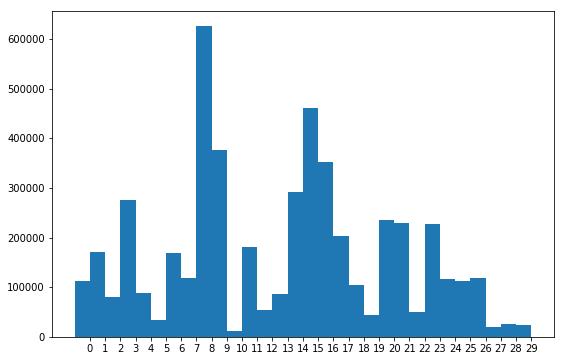

In [7]:
import numpy as np
import matplotlib.pyplot as plt

TRAIN_STATS_PKL = 'dataset/imagenetvid/train_stats.pkl'

plt.rcParams["figure.figsize"] = [9,6]

pkl_file = open(TRAIN_STATS_PKL, 'rb')
stats = pickle.load(pkl_file)
pkl_file.close()

counts = {}
total = 0
i = 0
for k, v in stats.items():
    counts[i] = v
    total += v
    i += 1
    
if len(counts) == 30:
    print('missing some class!')
print("Total of {0} objects".format(total))

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

## Testing Stats Pickle

In [2]:
import os
import xmltodict
import pickle

TYPE = "val"
ANNOTATIONS_PATH_STR = 'data/ILSVRC2015/Annotations/VID/'
PICKLE_FPATH = 'dataset/imagenetvid/val_data_stats.pkl'


if os.path.isfile(PICKLE_FPATH):
    pkl_file = open(PICKLE_FPATH, 'rb')
    stats = pickle.load(pkl_file)
    paths = pickle.load(pkl_file)
    pkl_file.close()
else:  
    paths = {
        "missing_bbox": [],
        "multiple_bboxes": [],
        "single_bboxes": []
    }
    stats = {
        "missing_bbox": 0,
        "multiple_bboxes": 0,
        "single_bboxes": 0
    }
    annotations_base_path = os.path.join(ANNOTATIONS_PATH_STR, TYPE)
    for dir1 in os.listdir(annotations_base_path):
        dir1 = os.path.join(annotations_base_path + "/" + dir1)
        for snippet_path in os.listdir(dir1):
            snippet_path = os.path.join(dir1 + "/" + snippet_path)

            counts = {
                "missing_bbox": 0,
                "multiple_bboxes": 0,
                "single_bboxes": 0,
                "total": 0
            }

            filepath = snippet_path
            if filepath[-3:] != 'xml':
                continue
            with open(filepath) as file:
                fobj = xmltodict.parse(file.read())

            annotation = fobj['annotation']
            if "object" not in annotation:
                # no bounding boxes
                counts["missing_bbox"] += 1
                stats["missing_bbox"] += 1
            elif isinstance(annotation["object"], list):
                # multiple objects in a frame
                counts["multiple_bboxes"] += 1
                stats["multiple_bboxes"] += 1
            else:
                # single object in a frame
                counts["single_bboxes"] += 1
                stats["single_bboxes"] += 1
            counts["total"] += 1

        if counts["missing_bbox"] > counts["multiple_bboxes"] and \
           counts["missing_bbox"] > counts["single_bboxes"]:
            # missing_bbox -> discard
            ratio = counts["missing_bbox"] / counts["total"]
            paths["missing_bbox"].append((dir1, ratio))
        elif counts["multiple_bboxes"] > counts["missing_bbox"] and \
           counts["multiple_bboxes"] > counts["single_bboxes"]:
            # multiple bboxes
            ratio = counts["multiple_bboxes"] / counts["total"]
            paths["multiple_bboxes"].append((dir1, ratio))
        else:
            # single bbox
            ratio = counts["single_bboxes"] / counts["total"]
            paths["single_bboxes"].append((dir1, ratio))
            
    paths['all'] = [e + ('single_bboxes',) for e in paths['single_bboxes']] + \
       [e + ('multiple_bboxes',) for e in paths['multiple_bboxes']] + \
       [e + ('missing_bbox',) for e in paths['missing_bbox']]
    
    paths['all_but_missing'] = [e + ('single_bboxes',) for e in paths['single_bboxes']] + \
       [e + ('multiple_bboxes',) for e in paths['multiple_bboxes']]
    
    # Save into Pickle         
    output = open(PICKLE_FPATH, 'wb')
    pickle.dump(stats, output, -1)
    pickle.dump(paths, output, -1)
    output.close()

In [3]:
stats

{'missing_bbox': 4046, 'multiple_bboxes': 53192, 'single_bboxes': 118888}